In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
file_path = r"../data_set/heart.csv"
df = pd.read_csv(file_path)


In [12]:

# --- BASIC DATA CHECKS ---

# First few rows
print("Preview of dataset:")
print(df.head(2))

# Shape of data
print("\nShape of data:", df.shape)

# Data types and non-null counts
print("\nInfo:")
print(df.info())

Preview of dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  

Shape of data: (918, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int

In [13]:

# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [14]:

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [15]:


# Check for zero values (could be invalid)
print("\nZero values in potentially invalid columns:")
print((df[['Cholesterol', 'RestingBP', 'MaxHR']] == 0).sum())


Zero values in potentially invalid columns:
Cholesterol    172
RestingBP        1
MaxHR            0
dtype: int64


In [16]:


# Unique values in key categorical columns
print("\nUnique values in categorical columns:")
for col in ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']:
    print(f"{col}: {df[col].unique()}")



Unique values in categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


/var/folders/fb/9qy5fcds6s17084zptz27q2w0000gn/T/ipykernel_45515/145655907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


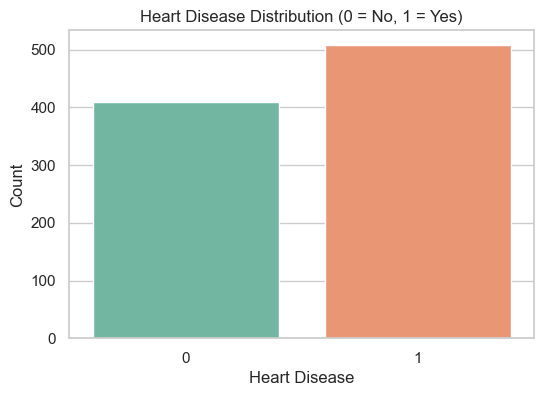

In [17]:

# --- TARGET VARIABLE DISTRIBUTION ---

plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

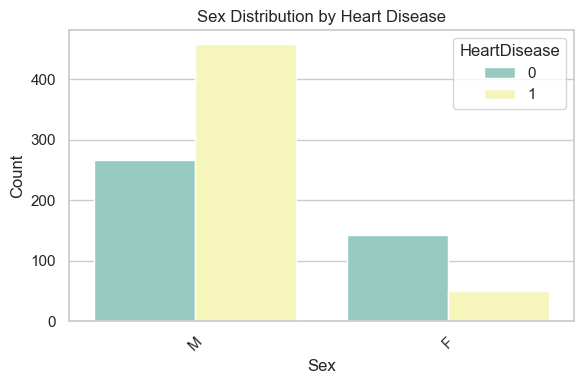

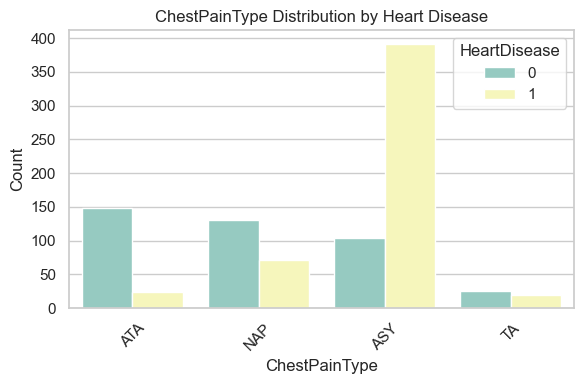

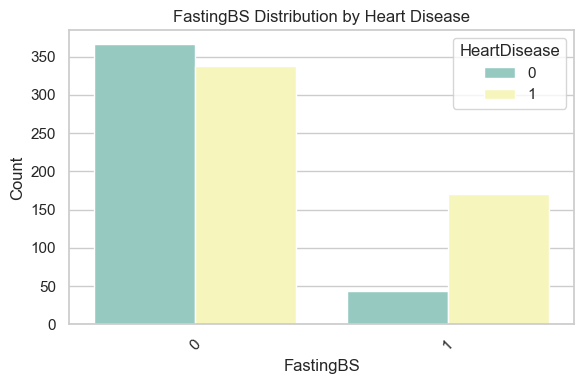

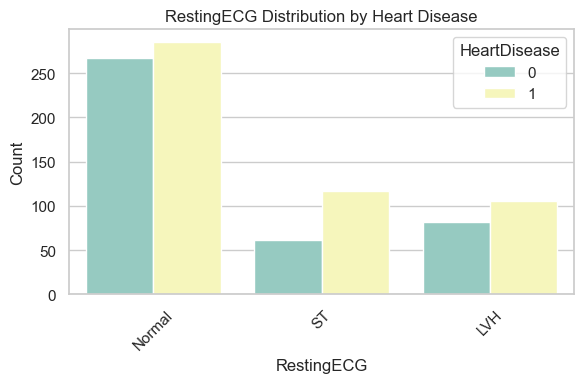

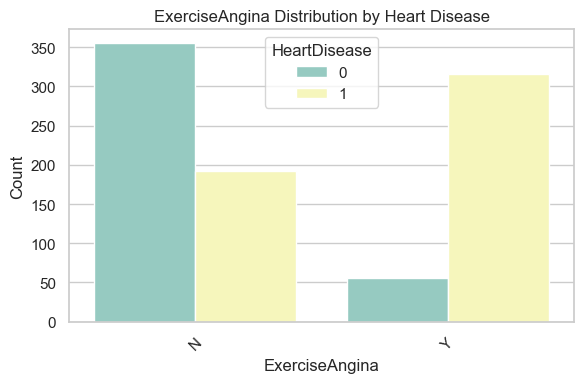

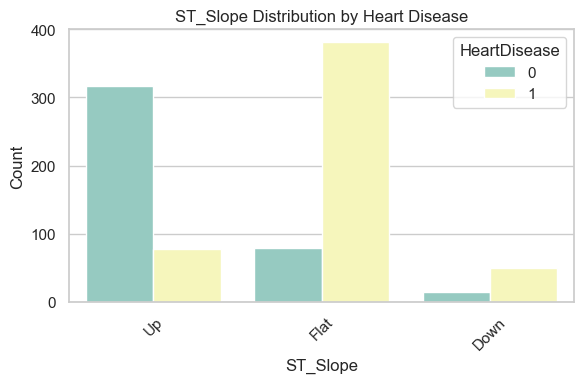

In [18]:


# --- CATEGORICAL FEATURES DISTRIBUTION ---

categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set3', hue='HeartDisease')
    plt.title(f'{col} Distribution by Heart Disease')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='HeartDisease')
    plt.tight_layout()
    plt.show()


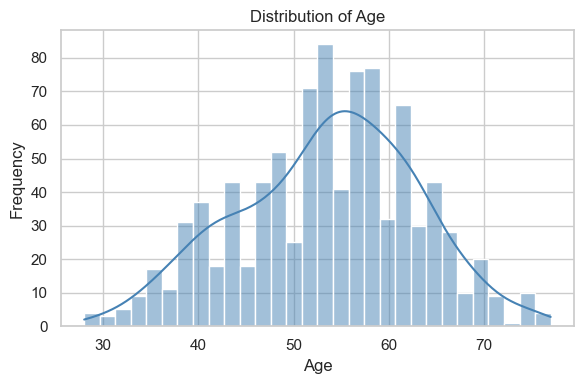

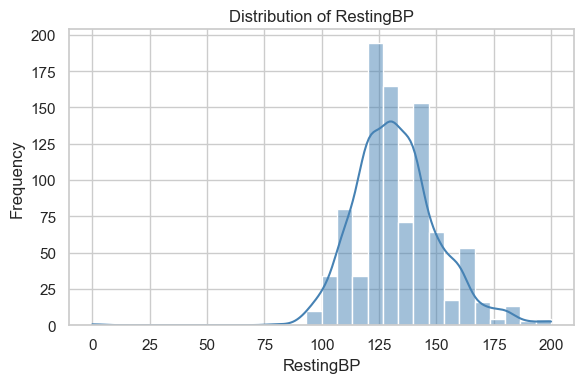

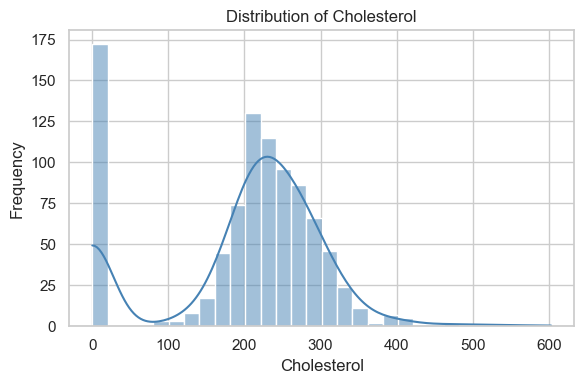

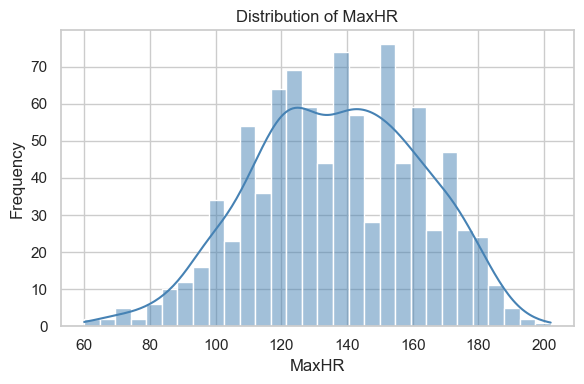

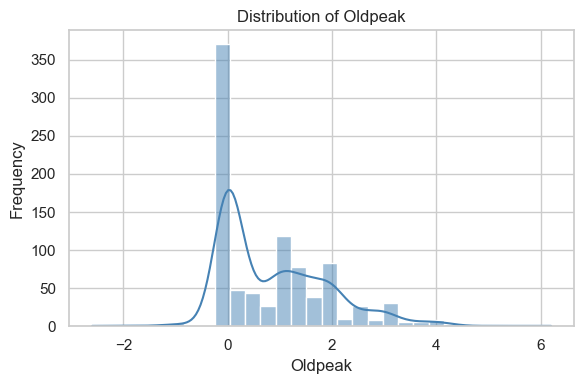

In [19]:

# --- NUMERICAL FEATURES DISTRIBUTION ---

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


/var/folders/fb/9qy5fcds6s17084zptz27q2w0000gn/T/ipykernel_45515/1534833169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')


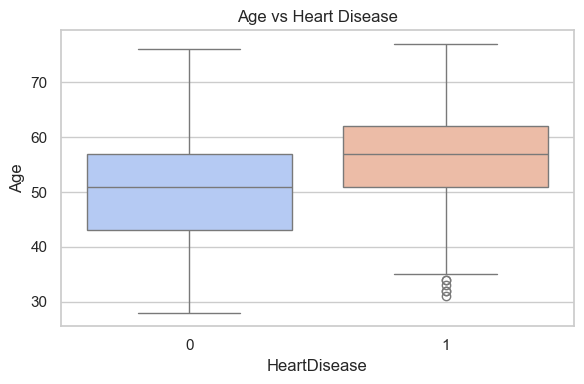

/var/folders/fb/9qy5fcds6s17084zptz27q2w0000gn/T/ipykernel_45515/1534833169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')


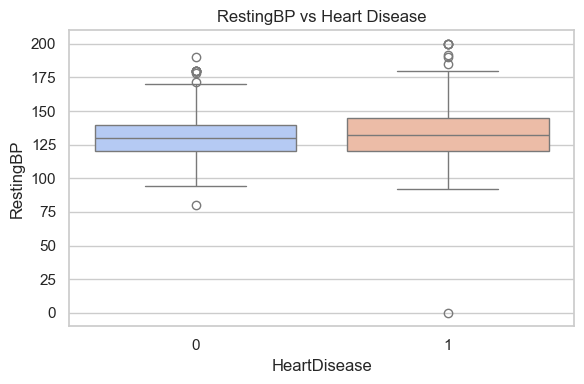

/var/folders/fb/9qy5fcds6s17084zptz27q2w0000gn/T/ipykernel_45515/1534833169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')


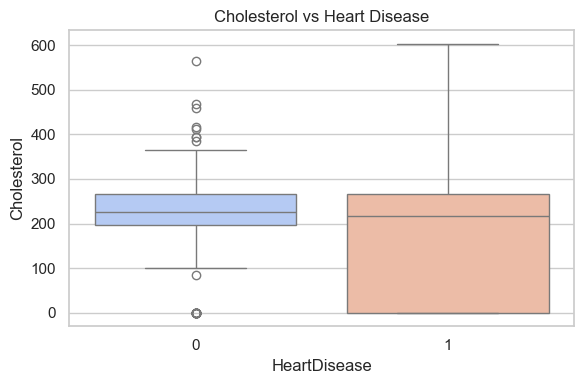

/var/folders/fb/9qy5fcds6s17084zptz27q2w0000gn/T/ipykernel_45515/1534833169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')


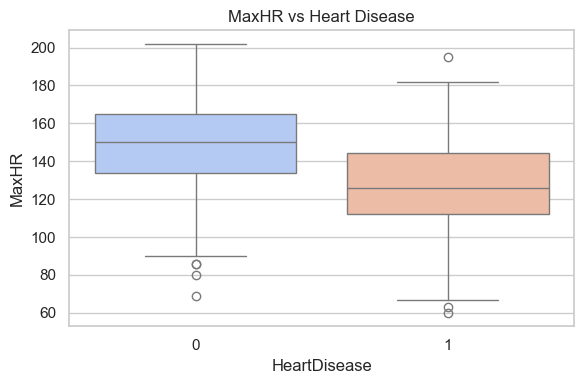

/var/folders/fb/9qy5fcds6s17084zptz27q2w0000gn/T/ipykernel_45515/1534833169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')


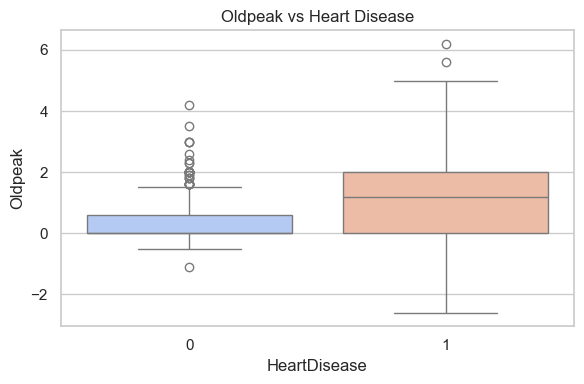

In [20]:

# --- BOX PLOTS FOR BIVARIATE ANALYSIS ---

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Heart Disease')
    plt.tight_layout()
    plt.show()

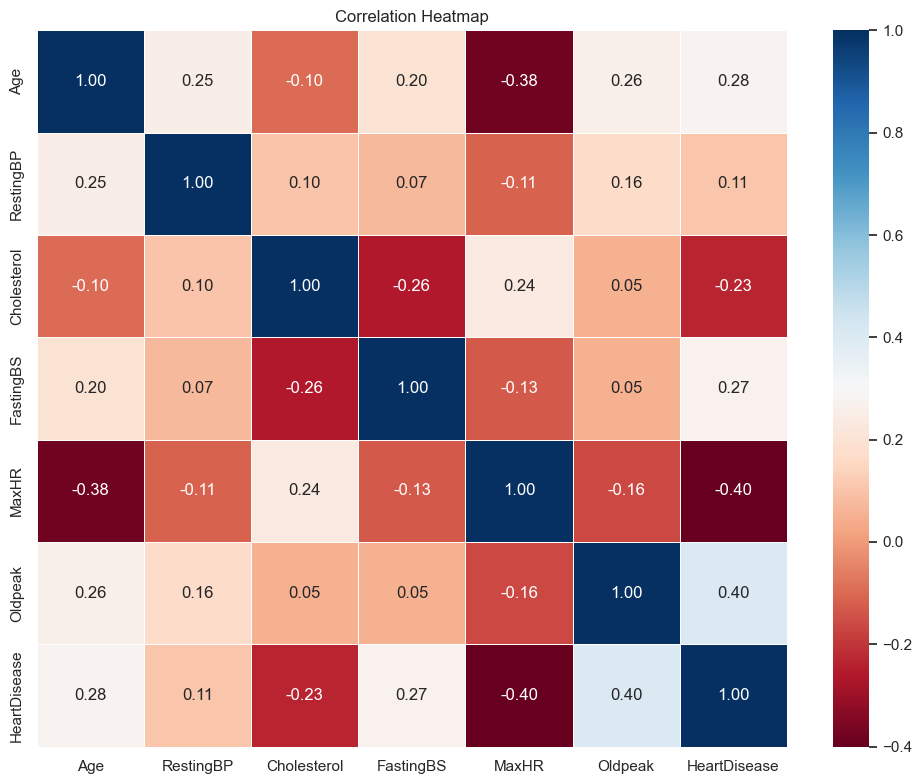

In [21]:


# --- CORRELATION HEATMAP ---

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
